### Sprawozdanie - Rozwiązywanie układów równań liniowych
<div style="text-align: right"> Wojciech Kosztyła </div>


#### Zadanie 1 - Metoda Gaussa-Jordana

Napisz i sprawdź funkcję rozwiązującą układ równań liniowych $n \times n$ metodą Gaussa-Jordana.
Dla rozmiarów macierzy współczynników większych niż $500 × 500$ porównaj
czasy działania zaimplementowanej funkcji z czasami uzyskanymi dla
wybranych funkcji bibliotecznych.

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

Rozpocząłem od implementacji funkcji rozwiązującej układ równań liniowych metodą Gaussa-Jordana.

In [2]:
def rozwiaz_metoda_Gaussa_Jordana(macierz_A, macierz_W):  # dostęp do macierzy definiuje jako macierz[y][x]
    n = len(macierz_W)

    for x in range(n):  # zaczynam iść od lewej strony macierzy głównej
        for y in range(x, n):  # szukam pierwszego niezerowego elementu w x-owej kolumnie
            if (macierz_A[y][x] == 0):
                pass
            else:   # jak znajdę niezerowy element, to dzielę wiersz przez taką liczbe, żeby w (x,y) było 1
                wspolczynnikA = macierz_A[y][x]
                macierz_A[y] = macierz_A[y] / wspolczynnikA
                macierz_W[y] = macierz_W[y] / wspolczynnikA
                for iterator in range(n):   # od wszystkich wierszy usuwam wielokrotność tego wiersza, aby powstała macierz diagonalna
                    if iterator==y:
                        pass
                    else:
                        wspolczynnikB = float(macierz_A[iterator][x] / macierz_A[y][x])
                        macierz_A[iterator] = macierz_A[iterator] - wspolczynnikB * macierz_A[y]
                        macierz_W[iterator] = macierz_W[iterator] - wspolczynnikB * macierz_W[y]
                break
    return macierz_W

Do przetestowania jej, potrzebuję jakiś układ równań liniowych.
Stworzyłem więc funkcję, która generuje takie układy.

In [3]:
def uklad_rownan_liniowych(n, zakres_start=0, zakres_end=10):
    macierz_glowna = (zakres_end - zakres_start) * np.random.random_sample((n, n)) + zakres_start
    while np.linalg.det(macierz_glowna) < 1e-6:
        macierz_glowna = (zakres_end - zakres_start) * np.random.random_sample((n, n)) + zakres_start

    macierz_wynikow = (zakres_end - zakres_start) * np.random.random_sample((n, 1)) + zakres_start

    return macierz_glowna, macierz_wynikow

Generuję więc układ równań:

In [4]:
A, B = uklad_rownan_liniowych(3)
print("macierz A:")
print(A)

print("macierz: B")
print(B)

macierz A:
[[2.78315105 8.10393798 8.68467974]
 [0.17405169 6.80240916 9.55754938]
 [9.72316106 1.27667463 0.04371591]]
macierz: B
[[1.98166041]
 [3.76029499]
 [3.03840931]]


Skoro mam układ równań to porównam wyniki mojej funkcji z wynikami funkcji bibliotecznej `np.linalg.solve`.
Zamieszczę również czas, jaki te obliczenia zajęły.

In [5]:
start = time.process_time()
print("\nlinalg.solve: ")
print(np.linalg.solve(A, B), "\n czas: ", time.process_time() - start)

start = time.process_time()
print("\nmoje: ")
print(rozwiaz_metoda_Gaussa_Jordana(A, B), "\n czas: ", time.process_time() - start)


linalg.solve: 
[[ 0.49251733]
 [-1.41881763]
 [ 1.39428519]] 
 czas:  0.0

moje: 
[[ 0.49251733]
 [-1.41881763]
 [ 1.39428519]] 
 czas:  0.0


Widzimy tutaj, że funkcja biblioteczna `np.linalg.solve` zwróciła taki sam wynik. Zakładam więc, że poprawnie zaimplementowałem moją funkcję.

Co do porównania wydajności - czas był taki krótki, że nawet nie został zarejestrowany (`0.0`).

<br>
Napisałem więc funkcję porównującą i wyświetlającą na grafie czasy rozwiązywania układów o zwiększającej się wielkości.

In [6]:
def porownaj_dwa_algorytmy(zasieg, skok, save=False, logs=False):
    filename = 'porownanie_czasu_algorytmow__zakres-' + str(zasieg) + '__skok-' + str(skok) + '.png'
    print("Rozpoczynam generowanie " + filename)

    czasy_linalg = []
    czasy_moje = []
    skoki = []

    i = 0
    while(i < zasieg):

        macierz_A, macierz_W = uklad_rownan_liniowych(i)

        start = time.process_time()
        np.linalg.solve(macierz_A, macierz_W)
        czas = time.process_time() - start
        czasy_linalg.append(czas)

        start = time.process_time()
        rozwiaz_metoda_Gaussa_Jordana(macierz_A, macierz_W)
        czas = time.process_time() - start
        czasy_moje.append(czas)

        skoki.append(i)
        if logs:
            print("Ukończono macierz " + str(i) + "x" + str(i))

        i += skok

    fig1, ax1 = plt.subplots(figsize=(10,6))
    ax1.set_title("Porównanie czasu wykonania algorytmów, skok:" + str(skok) )
    ax1.set_xlabel("Szerokość macierzy NxN (number)")
    ax1.set_ylabel("Czas [seconds]")
    ax1.plot(skoki, czasy_linalg, label="linalg.solve")
    ax1.plot(skoki, czasy_moje, label="moja implementacja Gaussa-Jordana")
    ax1.legend()
    if save:
        fig1.savefig("zad1/plots/"+filename)
        print("Plik " + filename + " został zapisany.")
        pass
    else:
        print("Skończone generowanie " + filename)

Funkcja przyjmuje koniec zakresu, a także "rozdzielczość" - skoki, gdyż dla dużych wielkości $n$ rozmiar $n+1$ jest bardzo zbliżony.

Umożliwia także zapisanie grafu do pliku, jak i wyświetlenie logów (przydatne przy generacji dla dużych $n$).

Przechodzę więc do testów.

Rozpoczynam generowanie porownanie_czasu_algorytmow__zakres-100__skok-1.png
Skończone generowanie porownanie_czasu_algorytmow__zakres-100__skok-1.png


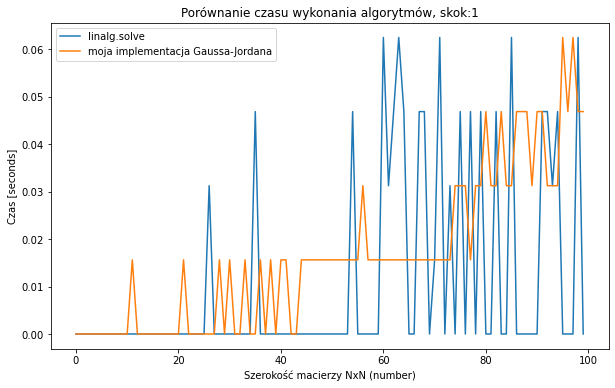

In [7]:
porownaj_dwa_algorytmy(zasieg=100, skok=1)

Dla zasięgu $n < 100$ ciężko jest stwierdzić, czy któryś z algorytmów jest lepszy - czasami moja implementacja jest wolniejsza, czasami biblioteczna, choć trzeba zauważyć, że borykamy się tutaj z niedokładnością pomiaru czasu.

Porównanie wykonam ponownie dla większego $n$.

In [8]:
#porownaj_dwa_algorytmy(zasieg=1000, skok=25)

Ten wykres już wyraźnie pokazuje przewagę implementacji bibliotecznej nad moją - czas potrzebny do wykonania mojej rośnie ekspotencjalnie, natomiast bibliotecznej zdaje się utrzymywać w okolicy funkcji stałej.

Funkcja biblioteczna albo wykorzystuje inny algorytm albo jest dużo lepiej zoptymalizowana (sądzę, że jedno i drugie).



#### Zadanie 2 - Faktoryzacja LU

Napisz i sprawdź funkcję dokonującą faktoryzacji $A = LU$ macierzy $A$.
Zastosuj częściowe poszukiwanie elementu wiodącego oraz skalowanie.

(w tym zadaniu napotkałem ogromną ilość problemów, związanych zarówno z środowiskiem jak i samym językiem Pythona (wynikiem czego, kod poniżej jest siódmą iteracją))

<br>
Rozpocząłem od stworzenia funkcji pomocniczych, potrzebnych w moim algorytmie.

In [9]:
def tworz_macierz_kwadratowa(n, zakres_start=0, zakres_end=10, asint=False):
    macierz = (zakres_end - zakres_start) * np.random.random_sample((n, n)) + zakres_start
    if asint:
        macierz = macierz.astype(int)
    else:
        macierz = macierz.astype(float)
    return macierz

def tworz_macierz_kwadratowa_z_zerami(n):
    macierz = np.zeros((n, n))
    macierz = macierz.astype(float)
    return macierz

def dodaj_diagonale(macierz, wartosc):
    n = len(macierz)
    for i in range(n):
        macierz[i][i] = wartosc
    return

Rozkład $A = L \cdot U$ przeprowadzę metodą Dolittle'a, tj.:
macierz trójkątna dolna L na diagonali ma tylko wartości $1$, a macierz trójkątna górna U może mieć dowolne.

Do implementacji samej funkcji wykonującej faktoryzację skorzystałem z algorytmu podanego w Kincaidzie (str.167).

Sama funkcja oprócz macierzy $L$ i $U$ zwraca także macierz $P$, która powiązana jest zależnością:

$P \cdot A = L \cdot U$

przy czym macierz $P$ jest macierzą permutacji.

Rozwiązanie to jest współbieżne z $A = L \cdot U$, gdyż macierz $P$ możemy odwrócić i otrzymać wzór na "czyste" $A$.

Zastosowałem skalowanie, jak również częściowe poszukiwanie elementu wiodącego.

In [10]:
def rozklad_LUP(a):
    n = len(a)

    u = np.copy(a)
    u = u.astype(float)
    p = tworz_macierz_kwadratowa_z_zerami(n)
    dodaj_diagonale(p, 1)
    l = tworz_macierz_kwadratowa_z_zerami(n)


    for i in range(n):  # skalowanie
        p[i] = p[i] / np.max(u[i])
        u[i] = u[i] / np.max(u[i])

    for i in range(n):

        # częściowe poszukiwanie elementu wiodącego
        max = u[i][i]
        indeks = i

        for j in range(i, n):
            if u[j][i] > max:
                max = u[j][i]
                indeks = j

        if indeks != i:
            u[[indeks, i]] = u[[i, indeks]]
            p[[indeks, i]] = p[[i, indeks]]
            l[[indeks, i]] = l[[i, indeks]]


        for k in range(i + 1, n):
            czynnik = u[k][i] / u[i][i]
            u[k] = u[k] - u[i] * czynnik
            u[k][i] = 0
            l[k][i] = czynnik

    dodaj_diagonale(l, 1)
    return p, l, u

Możemy zatem przetestować zaimplementowaną przeze mnie funkcję.

In [11]:
a = tworz_macierz_kwadratowa(n=6, zakres_start=-10, zakres_end=10)
p, l, u = rozklad_LUP(a)

In [12]:
print("P: \n{}\n".format(p))
#print(p)
print("A: \n{}\n".format(a))
#print(a)
print("L: \n{}\n".format(l))
#print(l)
print("U: \n{}\n".format(u))
#print(u)

P: 
[[0.         0.         0.         0.         0.         0.10120344]
 [0.         0.         0.         0.50033888 0.         0.        ]
 [0.         0.         0.         0.         0.10461627 0.        ]
 [0.18593612 0.         0.         0.         0.         0.        ]
 [0.         0.         0.13405928 0.         0.         0.        ]
 [0.         0.21302332 0.         0.         0.         0.        ]]

A: 
[[-2.54509272 -9.77124057 -5.60168462  4.09751395 -9.66611858  5.37819113]
 [ 3.14786664 -0.2179482  -6.12693996 -5.8622975   4.6943218   0.05734307]
 [ 6.32103773 -5.35108894 -8.47765759  6.7767879   4.65975544  7.45938653]
 [ 0.36142219  1.99864538 -1.50392387  0.88205619 -8.70190788 -7.00894394]
 [ 1.99029973  9.55874288  9.39117121 -3.62626325  5.13210224  6.38573916]
 [ 8.73062162  2.59975416 -5.10193171  9.88108664  4.19185751  4.47293747]]

L: 
[[ 1.          0.          0.          0.          0.          0.        ]
 [ 0.20466266  1.          0.          0.    

Dla potwierdzenia poprawności mogę policzyć macierze $P \cdot A$ i $L \cdot U$ i porównać ich wyniki.

In [13]:
print("P * A:\tnorma:{}\n{}\n".format(np.linalg.norm(np.dot(p, a)),np.dot(p, a)))
print("L * U:\tnorma:{}\n{}\n".format(np.linalg.norm(np.dot(l, u)),np.dot(l, u)))

print("\nRóżnica między normami:\n{}\n".format(np.linalg.norm(np.dot(p, a) - np.dot(l, u))))

P * A:	norma:7.570457653716539
[[ 0.88356898  0.26310408 -0.51633306  1.          0.42423042  0.45267668]
 [ 0.18083358  1.         -0.75247159  0.44132701 -4.35390288 -3.50684719]
 [ 0.20821773  1.          0.98246928 -0.37936613  0.53690138  0.6680522 ]
 [-0.47322467 -1.81682657 -1.04155551  0.76187585 -1.7972806   1.        ]
 [ 0.84739378 -0.71736314 -1.13650869  0.90849132  0.62468347  1.        ]
 [ 0.67056899 -0.04642805 -1.30518107 -1.24880606  1.          0.01221541]]

L * U:	norma:7.570457653716539
[[ 0.88356898  0.26310408 -0.51633306  1.          0.42423042  0.45267668]
 [ 0.18083358  1.         -0.75247159  0.44132701 -4.35390288 -3.50684719]
 [ 0.20821773  1.          0.98246928 -0.37936613  0.53690138  0.6680522 ]
 [-0.47322467 -1.81682657 -1.04155551  0.76187585 -1.7972806   1.        ]
 [ 0.84739378 -0.71736314 -1.13650869  0.90849132  0.62468347  1.        ]
 [ 0.67056899 -0.04642805 -1.30518107 -1.24880606  1.          0.01221541]]


Różnica między normami:
1.1366781

Widzimy, że różnice są wręcz minimalne, z zakresu błędu dokładności zmiennych.

#### Zadanie 3 - Analiza obwodu elektrycznego

Napisz program, który:

a) Wczytuje z pliku listę krawędzi grafu opisującego obwód elektryczny.
    Wagi krawędzi określają opór fragmentu obwodu między dwoma węzłami.
    Wierzchołki grafu identyﬁkowane są przez liczby naturalne.


b)  Wczytuje dodatkowo trójkę liczb (s,t,E), przy czym para (s,t) wskazuje
między którymi węzłami sieci przyłożono siłę elektromotoryczną E. Opór wewnętrzny SEM można zaniedbać.

c) Wykorzystując prawa Kirchhoﬀa znajduje natężenia prądu w każdej części obwodu
i przedstawia je na rysunku w postaci grafu ważonego z etykietami.

d) Wykorzystując metodę potencjałów węzłowych zaimplementuj alternatywne rozwiązanie problemu.

e) Przedstaw (wizualizacja + sprawdzenie poprawności wyników)
działanie programu dla grafów spójnych mających od 15 do 100 wierzchołków:

- Spójny graf losowy

- Graf 3-regularny (kubiczny)

- Graf złożony z dwóch grafów losowych połączonych mostkiem

- Graf siatka 2D


In [14]:
import networkx as nx

Rozpocząłem od napisania funkcji wczytującej graf z pliku.

In [15]:
def readWeightedGraph(nodesFile, edgesFile, directional):   # umożliwia czytanie zarówno grafów skierowanych jak i nieskierowanych
    if directional:
        G = nx.DiGraph()
    else:
        G = nx.Graph()

    edges = nx.read_edgelist(edgesFile, data=(('R', float),))
    nodes = nx.read_adjlist(nodesFile)

    G.add_nodes_from(nodes)
    G.add_edges_from(edges.edges(data=True))
    return G

Przyda się także wyświetlanie grafów.

In [16]:
def displayGraph(graph, wyswietlane='R', tytul="Graf węzłów i oporów"):    # wyświetlanie grafu i wag krawędzi (potrzebne, aby sprawdzić czy cokolwiek działa)
    pos = nx.circular_layout(graph)

    plt.figure(2, figsize=(10,6))
    plt.title(tytul)
    labels = nx.get_edge_attributes(graph, wyswietlane)
    nx.draw_networkx(graph, pos=pos, with_labels=True, font_weight='bold', node_color='red')
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=labels)
    #plt.show()

Do plików "edges" i "nodes" wstawiłem pewne dane.
Sprawdzę, czy działa wczytywanie grafów.

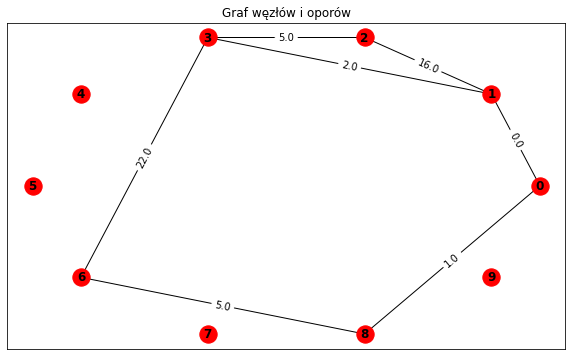

In [17]:
G = readWeightedGraph('zad3/nodes','zad3/edges', directional=False)
displayGraph(G)

Przedstawiony graf jest dokładnie tym grafem, który napisałem w pliku.

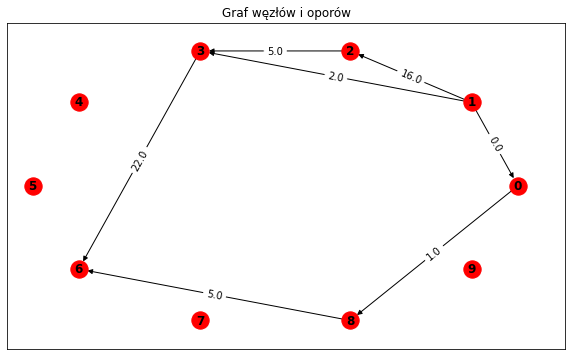

In [18]:
G = readWeightedGraph('zad3/nodes','zad3/edges', directional=True)
displayGraph(G)

Wczytanie tego grafu jako grafu skierowanego również działa.

Wczytując się w

"Using graph theory for automated electric circuit solving - L Toscano, S Stella, and E Milotti"
(zamieszczone w "materiały pomocnicze")

oraz czytając dokumentację biblioteki `networknx`

utworzyłem algorytm.

Wykorzystuję prawa Kirchoffa aby otrzymać $R\cdot I = E$, które mogę rozwiązać funkcją `np.linalg.solve`.

Postanowiłem poindeksować wszystkie z krawędzi oraz dodać do nich informację o SEM.

In [19]:
def readWeightedGraph(nodesFile, edgesFile, directional):   # umożliwia czytanie zarówno grafów skierowanych jak i nieskierowanych
    if directional:
        G = nx.DiGraph()
    else:
        G = nx.Graph()

    edges = nx.read_edgelist(edgesFile, nodetype=int, data=(('R', float),))
    nodes = nx.read_adjlist(nodesFile, nodetype=int)

    G.add_nodes_from(nodes)
    G.add_edges_from(edges.edges(data=True))

    for (indeks, (u, v, dane)) in enumerate(G.edges(data=True)):
        dane['index'] = indeks
        dane['sem'] = 0
    return G

Wykorzystam "Minimum Base Cycles" z biblioteki `networknx`, zwracające wszystkie "cykle" nieobjęte innymi cyklami (w przypadku układu ósemki zwraca dwa cykle kółka, a nie obwód ósemki).

In [20]:
def Kirchoff(G, s, t, E):

    if not G.has_edge(s,t):
        G.add_edge(s, t, R=0)
        G[s][t]['index'] = G.number_of_edges() - 1
        #G[s][t]['R'] = 0.0

    G[s][t]['sem'] = E      ## dodaj SEM

    n = G.number_of_nodes()
    m = G.number_of_edges()
    R = np.zeros((m+1,m))
    E = np.zeros((m+1,1))

    #for (u,v) in G.edges:
    for u in G.nodes:
        for v in G[u]:
            temp_index = G[u][v]['index']
            if u < v:
                R[u][temp_index] = 1.0
            else:
                R[u][temp_index] = -1.0

    cykle = nx.cycle_basis(G)
    for (indeks_cyklu, cykl) in enumerate(cykle):
        #print("Cykl: ", cykl)
        suma_napiec = 0.0
        for(indeks_node, node) in enumerate(cykl):
            node_A = cykl[indeks_node]
            node_B = cykl[ (indeks_node+1)%len(cykl) ]
            #print("NodeA", node_A, "NodeB", node_B)
            suma_napiec += G[node_A][node_B]['sem']

            temp_indeks = int(G[node_A][node_B]['index'])
            temp_r = G[node_A][node_B]['R']

            if node_A < node_B:
                R[n + indeks_cyklu][temp_indeks] +=  temp_r
            else:
                R[n + indeks_cyklu][temp_indeks] +=  (-1)*temp_r

        E[n + indeks_cyklu] = suma_napiec

    # z racji o 1 zbyt wielu równań, muszę jakiś usunąć
    # usunę więc niepotrzebny, tj. taki, po którego usunięciu otrzymam macierz nieosobliwą
    for i in range(m+1):
        wybrakowany_R = np.delete(R, i, 0)
        temp_det = np.linalg.det(wybrakowany_R)

        #if temp_det > 1e-9 or temp_det < -1e-9:
        if abs(temp_det) > 1e-9:
            wybrakowany_E = np.delete(E, i, 0)

            #print(wybrakowany_R)
            #print(wybrakowany_E)
            #print("\n")
            #print(R)
            #print(E)
            #print("\n")

            I = np.linalg.solve(wybrakowany_R, wybrakowany_E).squeeze()

            G_skierowany = G.to_directed()
            for (node_A, node_B) in G.edges:
                temp_I = I[ G[node_A][node_B]['index'] ]
                if temp_I < 0:
                    node_A, node_B = max(node_A,node_B), min(node_A, node_B)
                else:
                    node_B, node_A = max(node_A,node_B), min(node_A, node_B)

                G_skierowany.remove_edge(node_A, node_B)
                G_skierowany[node_B][node_A]['I'] = abs(temp_I)

            return G_skierowany

    return "brak rozwiązań?"


Teraz przetestuję ją dla prostych danych, aby łatwo potwierdzić, czy działa.

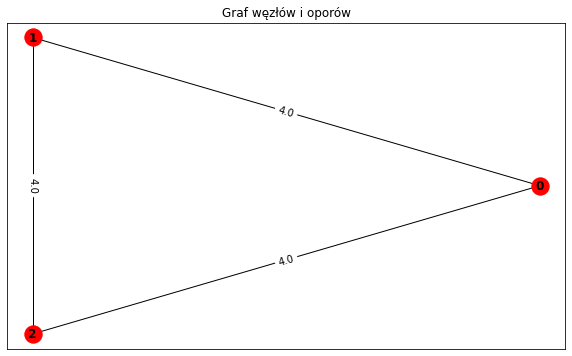

In [21]:
G = readWeightedGraph('zad3/nodes3','zad3/edges3', directional=False)
displayGraph(G)

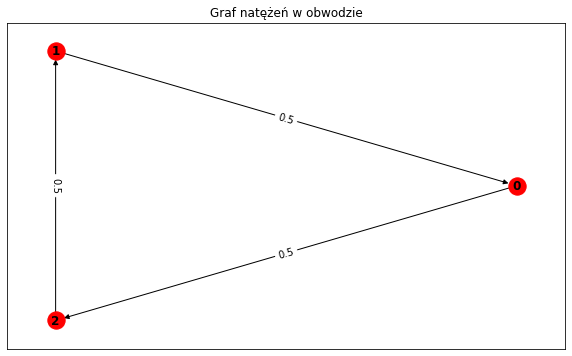

In [22]:
fff = Kirchoff(G, 0, 1, E=6)
print(fff)

displayGraph(fff, wyswietlane='I', tytul="Graf natężeń w obwodzie")

Widzimy, że dla oporu zastępczego $R_{Z} = 12\Omega$ i przyłożonego $SEM=6V$ prąd płynący wyszedł $0.5A$, czyli wszystko jest odpowiednio liczone.

Mogę przejść do wizualizacji.

___
- Spójny graf losowy:

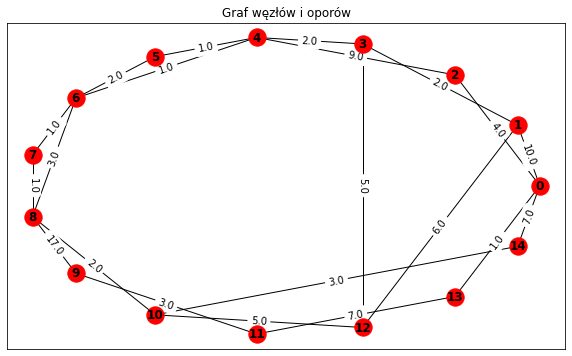

In [23]:
temp_G = readWeightedGraph('zad3/spojny_losowy_nodes','zad3/spojny_losowy_edges', directional=False)
displayGraph(temp_G)

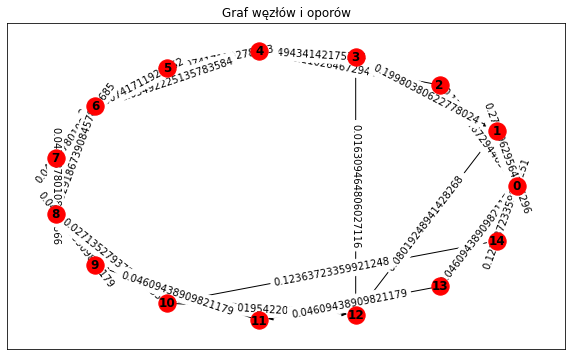

In [24]:
temp_G_po = Kirchoff(temp_G, 0, 1, 5)
displayGraph( temp_G_po, wyswietlane='I' )

Aby sprawdzić rozwiązanie potrzebuję nowej funkcji sprawdzającej prawa Kirchoffa.
Niestety z powodu, że graf jest skierowany nie jest już moż

In [25]:
def sprawdz_Kirchhoffa(G):

    for node in G.nodes:
        suma_natezen = 0.0
        for (u, v, dane) in G.out_edges(node, data=True):
            suma_natezen += dane['I']
        for (u, v, dane) in G.in_edges(node, data=True):
            suma_natezen -= dane['I']
        if abs(suma_natezen) > 1e-6:
            print("Błąd w pierwszym prawie Kirchoffa")
            return "error"

    # brak możliwości znalezienia cykli w skierowanym grafie!
    return "Wszystko ok!"


In [26]:
sprawdz_Kirchhoffa(temp_G_po)

'Wszystko ok!'

Ten układ przeszedł testy.

Przejdę do pozostałych testów.

___
- Graf 3-regularny (kubiczny)

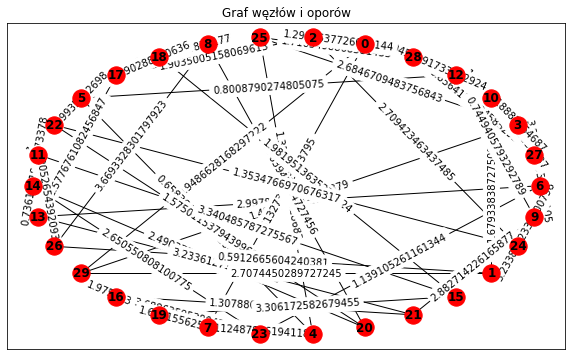

In [27]:
temp_G = nx.random_regular_graph(3, 30)
for (indeks, (u, v, dane)) in enumerate(temp_G.edges(data=True)):
    dane['index'] = indeks
    dane['sem'] = 0
    dane['R'] = np.random.uniform(0.5,4.0)

displayGraph(temp_G)

'Wszystko ok!'

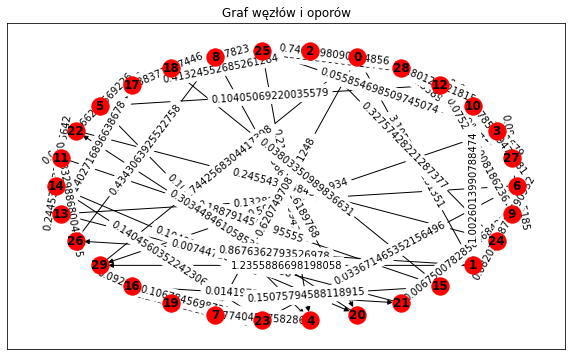

In [28]:
temp_G_po = Kirchoff(temp_G, 0, 1, 5)
displayGraph( temp_G_po, wyswietlane='I' )
sprawdz_Kirchhoffa(temp_G_po)

___
- Graf złożony z dwóch grafów losowych połączonych mostkiem

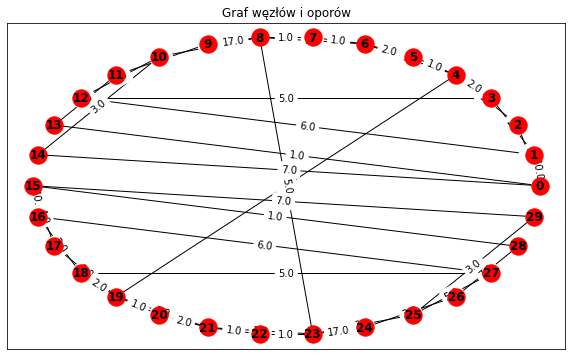

In [29]:
temp_G = readWeightedGraph('zad3/most_nodes','zad3/most_edges', directional=False)
displayGraph(temp_G)

'Wszystko ok!'

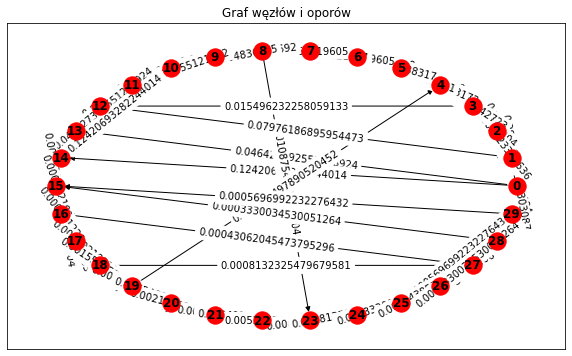

In [30]:
temp_G_po = Kirchoff(temp_G, 0, 1, 5)
displayGraph( temp_G_po, wyswietlane='I' )
sprawdz_Kirchhoffa(temp_G_po)

___
- Graf siatka 2D:


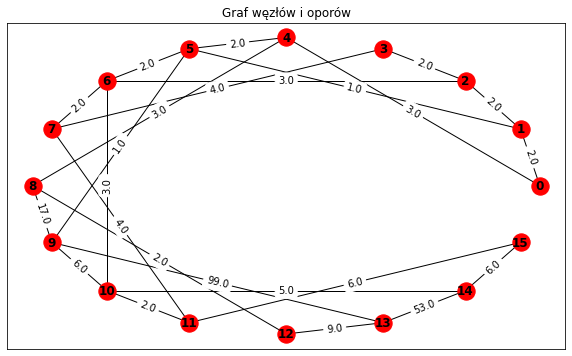

In [31]:
temp_G = readWeightedGraph('zad3/siatka_nodes','zad3/siatka_edges', directional=False)
displayGraph(temp_G)

Nie widać układu siatki w ten sposób. Zmodyfikuję.


In [32]:
def displayGraph(graph, pos, wyswietlane='R', tytul="Graf węzłów i oporów"):    # wyświetlanie grafu i wag krawędzi (potrzebne, aby sprawdzić czy cokolwiek działa)

    plt.figure(2, figsize=(10,6))
    plt.title(tytul)
    labels = nx.get_edge_attributes(graph, wyswietlane)
    nx.draw_networkx(graph, pos=pos, with_labels=True, font_weight='bold', node_color='red')
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=labels)
    #plt.show()

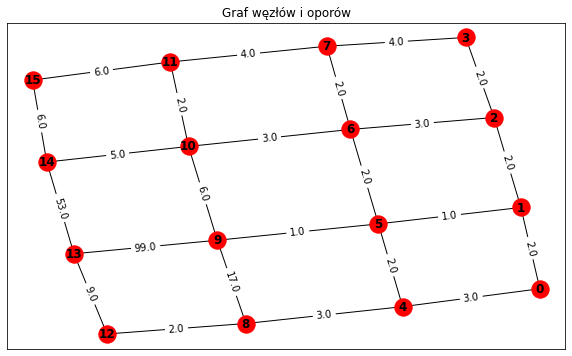

In [33]:
pos = nx.spring_layout(temp_G)
displayGraph(temp_G, pos=pos)

'Wszystko ok!'

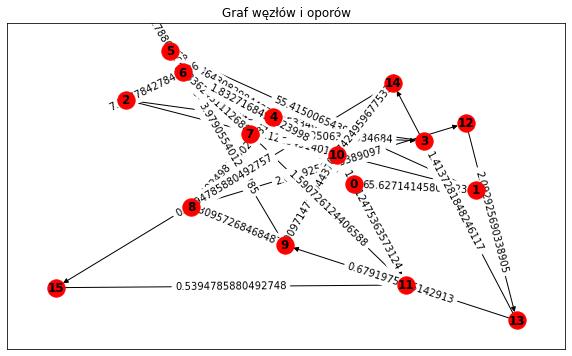

In [34]:
pos = nx.spring_layout(temp_G_po)
temp_G_po = Kirchoff(temp_G, 0, 1, 500)
displayGraph( temp_G_po , pos=pos, wyswietlane='I')
sprawdz_Kirchhoffa(temp_G_po)